<a href="https://colab.research.google.com/github/hanyuc37/stc510/blob/main/Hanyu_Chen_Text_Analysis_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We're talking tens of thousands of questions and answers. The thing is, we need to be able to categorize these into questions/answers that are high value intelligence and those that are of lesser value."

We need you to give us something that will work without you ever seeing our transcripts. We were thinking you might be able to use a collection of questions and answersLinks to an external site. (or really, answers and questions) from the television show 'Jeopardy!' to build a classifier that might work. It is a long-shot, since there isn't a lot of linguistic difference between low- and high-value questions, but even if you can demonstrate it can't be done effectively using some common approaches, it will at least give us something to go on."


Parse, clean, and organize the Jeopardy! question data file to train a Naive Bayesian classifier.
Pass the Text Analysis Basics quiz with a score of 85% or better.
Just as we have built a classifier above, your aim here is to make sense of the data presented, and create a binary classifier ("high value" and "low value," based on the points available for each) for questions. Despite the large number of questions, this is an extraordinarily difficult classification problem. Consider it as a human coder: how often could you tell those questions that are "easy" versus "hard"? The degree to which you are successful in this is largely based on your own contextual knowledge--indeed, you might be tempted to classify questions you know the answer to as "easy" and those you do not as "hard." The computer doesn't know the answers to any of these.

For that reason, do not be discouraged if your classifier does not perform well. This constitutes an especially difficult problem for a simple classifier to solve.

In [2]:
import numpy as np
import pandas as pd

In [ ]:
jeopardy = pd.read_json("/content/drive/MyDrive/STC 510/Text Analytics/jeopardy.json")

In [ ]:
jeopardy.head()

,category,air_date,question,value,answer,round,show_number
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680


In [3]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# change all the text in lowercases
for i in range(len(jeopardy['question'])):
  jeopardy['question'][i] = jeopardy['question'][i].lower()

<ipython-input-5-1ddb7fc099cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeopardy['question'][i] = jeopardy['question'][i].lower()


In [ ]:
# Change `category` to lowercases
for i in range(len(jeopardy['category'])):
  jeopardy['category'][i] = jeopardy['category'][i].lower()

<ipython-input-6-7f4b8743aac4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeopardy['category'][i] = jeopardy['category'][i].lower()


In [ ]:
# Change the `answer` column to lowercases
for i in range(len(jeopardy['answer'])):
  jeopardy['answer'][i] = jeopardy['answer'][i].lower()

<ipython-input-7-321e5be7241c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeopardy['answer'][i] = jeopardy['answer'][i].lower()


In [ ]:
# dealing with NAs
jeopardy.isna().sum()
jeopardy = jeopardy.dropna(axis = 0)

In [ ]:
#jeopardy.to_csv("jeopardy_lower.csv")

In [92]:
jeopardy = pd.read_csv("/content/drive/MyDrive/STC 510/Text Analytics/jeopardy_lower.csv")

In [93]:
# tokenize
token_questions = [word_tokenize(x) for x in jeopardy['question']]

In [94]:
# Create a column with tokenized questions
jeopardy['token_questions'] = token_questions

In [95]:
jeopardy.head()
jeopardy = jeopardy.drop(columns = 'Unnamed: 0')

Remove punctuations and stop words

In [96]:
import string
from nltk import download
from nltk.corpus import stopwords
download('stopwords')
eng_stopwords = set(stopwords.words('english')+ list(string.punctuation)+['``','...']) #some wired puncts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
# Remove stopped words and punctuations
for i in range(len(jeopardy['token_questions'])):
  for j in jeopardy['token_questions'][i]:
    if j in eng_stopwords:
      jeopardy['token_questions'][i].remove(j)

In [98]:
# Stemmer
from nltk import PorterStemmer, WordNetLemmatizer
download('wordnet')
stemmer = PorterStemmer()
for i in range(len(jeopardy['token_questions'])):
  for j in jeopardy['token_questions'][i]:
    j = stemmer.stem(j)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [99]:
jeopardy_c = jeopardy.copy()

Define `high-value` and `low-value` based on the value of each question. I assume the higher the value in $, the harder the question is.

In [100]:
jeopardy_c.head()

,category,air_date,question,value,answer,round,show_number,token_questions
0,history,2004-12-31,"'for the last 8 years of his life, galileo was...",$200,copernicus,Jeopardy!,4680,"['for, last, 8, years, his, life, galileo, und..."
1,espn's top 10 all-time athletes,2004-12-31,'no. 2: 1912 olympian; football star at carlis...,$200,jim thorpe,Jeopardy!,4680,"['no, 2, 1912, olympian, football, star, carli..."
2,everybody talks about it...,2004-12-31,'the city of yuma in this state has a record a...,$200,arizona,Jeopardy!,4680,"['the, city, yuma, this, state, a, record, ave..."
3,the company line,2004-12-31,"'in 1963, live on ""the art linkletter show"", t...",$200,mcdonald\'s,Jeopardy!,4680,"['in, 1963, live, ``, art, linkletter, show, '..."
4,epitaphs & tributes,2004-12-31,"'signer of the dec. of indep., framer of the c...",$200,john adams,Jeopardy!,4680,"['signer, the, dec., indep., framer, the, cons..."


In [101]:
# Delete the '$' from values
jeopardy_c['value'].unique()
jeopardy_c['value'] = jeopardy_c['value'].str.replace('$','')
jeopardy_c['value'] = jeopardy_c['value'].str.replace(',','')

<ipython-input-101-703a47bf69de>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  jeopardy_c['value'] = jeopardy_c['value'].str.replace('$','')


600.0


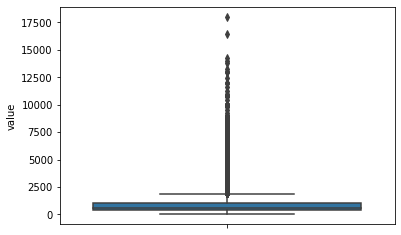

In [102]:
# Convert value to integer
jeopardy_c['value'] = jeopardy_c['value'].astype(int)
# Check the distribution of values
import seaborn as sns
sns.boxplot(y = jeopardy_c['value']) 
# A lot of outliers, use median as the threshold of "high-value" and "low-value"
print(jeopardy_c['value'].median()) # 600
value_p = []
for value in jeopardy_c['value']:
  if value <= 600:
    value_p.append("low value")
  else:
    value_p.append("high value")
jeopardy_c['value_p'] = value_p

In [105]:
# unlist `token_question` column
for i in range(len(jeopardy_c['token_questions'])):
  jeopardy_c['token_questions'][i] = ((((str(jeopardy_c['token_questions'][i]).replace(',','')).replace ('[','')).replace(']','')).replace("'",'')).replace('"','')

<ipython-input-105-8ae660377123>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeopardy_c['token_questions'][i] = ((((str(jeopardy_c['token_questions'][i]).replace(',','')).replace ('[','')).replace(']','')).replace("'",'')).replace('"','')


In [106]:
jeopardy_c.head()

,category,air_date,question,value,answer,round,show_number,token_questions,value_p
0,history,2004-12-31,"'for the last 8 years of his life, galileo was...",200,copernicus,Jeopardy!,4680,for last 8 years his life galileo under house ...,low value
1,espn's top 10 all-time athletes,2004-12-31,'no. 2: 1912 olympian; football star at carlis...,200,jim thorpe,Jeopardy!,4680,no 2 1912 olympian football star carlisle indi...,low value
2,everybody talks about it...,2004-12-31,'the city of yuma in this state has a record a...,200,arizona,Jeopardy!,4680,the city yuma this state a record average 4055...,low value
3,the company line,2004-12-31,"'in 1963, live on ""the art linkletter show"", t...",200,mcdonald\'s,Jeopardy!,4680,in 1963 live `` art linkletter show this comp...,low value
4,epitaphs & tributes,2004-12-31,"'signer of the dec. of indep., framer of the c...",200,john adams,Jeopardy!,4680,signer the dec. indep. framer the constitution...,low value


Prediction

In [144]:
# Test Train Split
# train/test = 0.7/0.3
X = jeopardy_c['token_questions']
y = jeopardy_c['value_p']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 37)

In [145]:
# Feature extraction using tfidf model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
tfidf_vectorizer = TfidfVectorizer(use_idf = True)
X_train_tf = tfidf_vectorizer.fit_transform(X_train)
X_test_tf = tfidf_vectorizer.transform(X_test)

In [148]:
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes
naive_bayes = MultinomialNB()
# train_test spilit
naive_bayes.fit(X_train_tf, y_train)
predictions = naive_bayes.predict(X_test_tf)
print('Accuracy',accuracy_score(y_test, predictions))

Accuracy 0.586303895982122


I got an accuracy score of 0.586 predicting the value of questions